<a href="https://colab.research.google.com/github/lizzard2003/Account-Balance/blob/main/Mimimizing_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# First import the functions we will need
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# This script requires TensorFlow 2 and Python 3.
if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))


# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

In [28]:
# Define our initial guess
INITIAL_W = 1.0
INITIAL_B = 2.0

# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

### Train our model

In [31]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.10

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print(f"Epoch {epoch:2d}: w={list_w[-1]:1.2f} b={list_b[-1]:1.2f}, "
        f"loss={current_loss:2.5f}")

Epoch  0: w=1.00 b=2.00, loss=5.16667
Epoch  1: w=1.13 b=1.70, loss=4.15074
Epoch  2: w=1.22 b=1.42, loss=3.33790
Epoch  3: w=1.30 b=1.17, loss=2.68429
Epoch  4: w=1.37 b=0.95, loss=2.15867
Epoch  5: w=1.44 b=0.75, loss=1.73597
Epoch  6: w=1.50 b=0.57, loss=1.39604
Epoch  7: w=1.55 b=0.40, loss=1.12268
Epoch  8: w=1.59 b=0.26, loss=0.90284
Epoch  9: w=1.64 b=0.13, loss=0.72605
Epoch 10: w=1.67 b=0.01, loss=0.58388
Epoch 11: w=1.71 b=-0.09, loss=0.46955
Epoch 12: w=1.74 b=-0.19, loss=0.37760
Epoch 13: w=1.76 b=-0.27, loss=0.30366
Epoch 14: w=1.79 b=-0.35, loss=0.24420
Epoch 15: w=1.81 b=-0.41, loss=0.19638
Epoch 16: w=1.83 b=-0.47, loss=0.15793
Epoch 17: w=1.85 b=-0.53, loss=0.12700
Epoch 18: w=1.86 b=-0.58, loss=0.10214
Epoch 19: w=1.88 b=-0.62, loss=0.08214
Epoch 20: w=1.89 b=-0.66, loss=0.06605
Epoch 21: w=1.90 b=-0.69, loss=0.05312
Epoch 22: w=1.91 b=-0.73, loss=0.04272
Epoch 23: w=1.92 b=-0.75, loss=0.03435
Epoch 24: w=1.93 b=-0.78, loss=0.02763
Epoch 25: w=1.94 b=-0.80, loss=0.022

### Plot our trained values over time

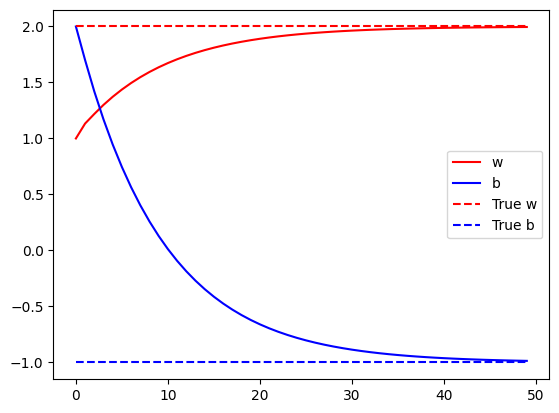

In [32]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()